In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
! pip install catboost
import catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c house-prices-advanced-regression-techniques
! unzip -qq house-prices-advanced-regression-techniques.zip

Saving kaggle.json to kaggle.json
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 61.0MB/s]


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis = 1), data['SalePrice'], random_state = 42)

# Шаг 0 : мини EDA


In [ ]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdWo,Shed,600,8,2007,WD,Normal
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,500,4,2007,COD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [ ]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1095.000000,1095.000000,895.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1091.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,727.669406,57.118721,70.394413,10747.046575,6.129680,5.56895,1971.107763,1984.854795,103.368469,448.178082,...,477.539726,96.194521,49.633790,21.118721,3.918721,15.917808,3.152511,40.529680,6.361644,2007.818265
std,424.545069,42.624531,25.219301,11065.878057,1.366746,1.10448,30.605697,20.732472,171.644715,457.898505,...,210.563755,130.396336,69.134174,61.315608,32.186042,56.844110,43.008391,328.354566,2.680894,1.325752
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.00000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,360.500000,20.000000,59.000000,7589.000000,5.000000,5.00000,1953.500000,1966.000000,0.000000,0.000000,...,349.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,728.000000,50.000000,70.000000,9600.000000,6.000000,5.00000,1972.000000,1994.000000,0.000000,387.000000,...,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1096.500000,70.000000,80.000000,11700.000000,7.000000,6.00000,2001.000000,2004.000000,166.000000,724.000000,...,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.00000,2010.000000,2010.000000,1378.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1023 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1095 non-null   int64  
 1   MSSubClass     1095 non-null   int64  
 2   MSZoning       1095 non-null   object 
 3   LotFrontage    895 non-null    float64
 4   LotArea        1095 non-null   int64  
 5   Street         1095 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1095 non-null   object 
 8   LandContour    1095 non-null   object 
 9   Utilities      1095 non-null   object 
 10  LotConfig      1095 non-null   object 
 11  LandSlope      1095 non-null   object 
 12  Neighborhood   1095 non-null   object 
 13  Condition1     1095 non-null   object 
 14  Condition2     1095 non-null   object 
 15  BldgType       1095 non-null   object 
 16  HouseStyle     1095 non-null   object 
 17  OverallQual    1095 non-null   int64  
 18  Overa

In [ ]:
for name, null in zip(X_train.isnull(), X_train.isnull().sum()):
  print(name, null)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 200
LotArea 0
Street 0
Alley 1025
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 4
MasVnrArea 4
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 27
BsmtCond 27
BsmtExposure 27
BsmtFinType1 27
BsmtFinSF1 0
BsmtFinType2 27
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 512
GarageType 58
GarageYrBlt 58
GarageFinish 58
GarageCars 0
GarageArea 0
GarageQual 58
GarageCond 58
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1089
Fence 877
MiscFeature 1052
MiscVal 0
MoSold 0
YrSold

In [ ]:
Alley 1025
PoolQC 1089
MiscFeature 1052

In [ ]:
X_train, X_test = X_train.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1), X_test.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1)

In [ ]:
y_train.isnull().sum()

0

In [ ]:
print('mean of our target = {}'.format(np.mean(y_train)))

mean of our target = 181712.28675799086


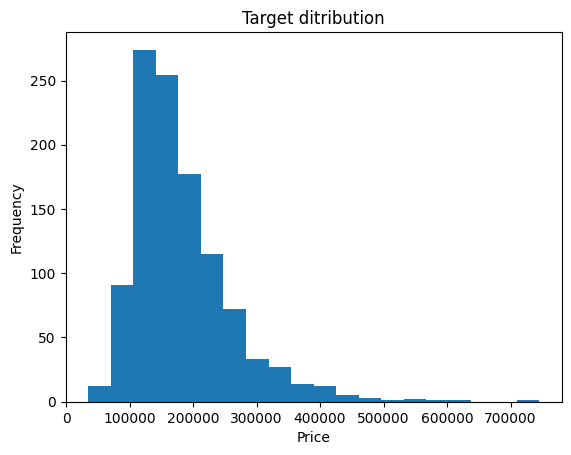

In [ ]:
plt.title('Target ditribution')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.hist(y_train, bins = 20)
plt.show()

In [ ]:
X_train.drop('Id', axis = 1, inplace = True)
X_test.drop('Id', axis = 1, inplace = True)

In [ ]:
cat_cols = [name for name in X_train.columns if X_train[name].dtypes == 'object']
num_cols = [name for name in X_train.columns if name not in cat_cols]

In [ ]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
X_train[cat_cols] = enc.fit_transform(X_train[cat_cols])
X_test[cat_cols] = enc.transform(X_test[cat_cols])

# Data imputation

Модель, на которой мы будем тестировать

In [ ]:
def test(X_train, y_train, X_test, y_test):
       cb = CatBoostRegressor(verbose = 0)
       cb.fit(X_train, y_train)
       metrics = np.sqrt(mse(cb.predict(X_test), y_test))
       print('test RMSE = {}'.format(metrics))

## Ничего не заполнять

Имеется множество библиотек, где модели могут работать автоматически с пропусками или самостоятельно их заполнять. Чаще всего это древовидные бустинги. Catboost, Xgboost, LGBM, GBDT

In [ ]:
test(X_train, y_train, X_test, y_test)

test RMSE = 25029.35444800372


## Simple imputer

In [ ]:
from sklearn.impute import SimpleImputer

Типы режимов\
If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.\
If “median”, then replace missing values using the median along each column. Can only be used with numeric data.\
If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.\
If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.\

constant

In [ ]:
imp = SimpleImputer(strategy = 'constant', fill_value = 0)

In [ ]:
imp_train = imp.fit_transform(X_train)
imp_test = imp.transform(X_test)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 25999.024724882485


mean for numeric, most_frequent for categorical

In [ ]:
imp_num = SimpleImputer(strategy = 'mean')
imp_cat = SimpleImputer(strategy = 'most_frequent')

imp_train = np.concatenate((imp_num.fit_transform(X_train[num_cols]), imp_cat.fit_transform(X_train[cat_cols])), axis = 1)
imp_test = np.concatenate((imp_num.transform(X_test[num_cols]), imp_cat.transform(X_test[cat_cols])), axis = 1)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 25408.141097146497


## Random imputer

In [ ]:
! pip install feature-engine
from feature_engine.imputation import *

In [ ]:
imp = RandomSampleImputer(random_state=17)
imp_train = imp.fit_transform(X_train)
imp_test = imp.transform(X_test)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 25590.053620980267


## End Tail Imputer

In [ ]:
imp_num = EndTailImputer(imputation_method = 'iqr')
imp_cat = SimpleImputer(strategy = 'constant', fill_value = 0)

imp_train = np.concatenate((imp_num.fit_transform(X_train[num_cols]), imp_cat.fit_transform(X_train[cat_cols])), axis = 1)
imp_test = np.concatenate((imp_num.transform(X_test[num_cols]), imp_cat.transform(X_test[cat_cols])), axis = 1)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 25109.019054849003


## Iterative Imputer

In [ ]:
X_train[cat_cols] = X_train[cat_cols].astype(str)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(estimator = LinearRegression(), initial_strategy = 'constant', max_iter = 10)

imp_train = imp.fit_transform(X_train)
imp_test = imp.transform(X_test)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 26187.162765089244


Так правильнее, но дольше

In [ ]:
imp_num = IterativeImputer(estimator = LinearRegression(), initial_strategy = 'constant')
imp_cat = IterativeImputer(estimator = LogisticRegression(max_iter = 1000), initial_strategy = 'constant')

imp_train = np.concatenate((imp_num.fit_transform(X_train[num_cols]), imp_cat.fit_transform(X_train[cat_cols])), axis = 1)
imp_test = np.concatenate((imp_num.transform(X_test[num_cols]), imp_cat.transform(X_test[cat_cols])), axis = 1)
test(imp_train, y_train, imp_test, y_test)

## Catboost imputer

In [ ]:
imp = IterativeImputer(estimator = CatBoostRegressor(n_estimators = 50, verbose = 0), initial_strategy = 'constant')

imp_train = imp.fit_transform(X_train)
imp_test = imp.transform(X_test)
test(imp_train, y_train, imp_test, y_test)

## Knn imputer

In [ ]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors = 2)

imp_train = imp.fit_transform(X_train)
imp_test = imp.transform(X_test)
test(imp_train, y_train, imp_test, y_test)

test RMSE = 25444.13245671626


## Mice imputer

In [ ]:
!pip install autoimpute

from autoimpute.imputations import MiceImputer

X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

strategy = {}
cat_strategy = 'categorical'
num_strategy = 'interpolate'
for name in X_train.columns:
  if name in cat_cols:
    strategy[name] = cat_strategy
  else:
    strategy[name] = num_strategy

imp = MiceImputer(
    n=10,
    strategy=strategy,
    visit="left-to-right",
    return_list = True,
)

imp_train = dict(imp.fit_transform(X_train))[1]
imp_test = dict(imp.transform(X_test))[1]

test(imp_train, y_train, imp_test, y_test)

test RMSE = 24705.154940362852


В заключении - советую полистать данный ноутбук. Там много красивых графиков и показан интересный подход к заполнению пропусков. https://www.kaggle.com/code/arunklenin/ps3e15-iterative-catboost-imputer-ensemble